# Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

In [1]:
import numpy as np
import pandas as pd

### Creating Timestamp objects

In [2]:
# creating a timestamp
type(pd.Timestamp('2023/1/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
# variations
pd.Timestamp('2023-1-5')
pd.Timestamp('2023, 1, 5')

Timestamp('2023-01-05 00:00:00')

In [4]:
# only year
pd.Timestamp('2023')

Timestamp('2023-01-01 00:00:00')

In [5]:
# using text
pd.Timestamp('5th January 2023')

Timestamp('2023-01-05 00:00:00')

In [6]:
# providing time also
pd.Timestamp('5th January 2023 9:21AM')
# pd.Timestamp('2023/1/5/9/21')

Timestamp('2023-01-05 09:21:00')

In [7]:
# AM and PM

In [8]:
# using datetime.datetime object
import datetime as dt

x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x

Timestamp('2023-01-05 09:21:56')

In [34]:
# fetching attributes
print(x.year , x.month, x.day, x.hour, x.minute, x.second)

2023 1 5 9 21 56


In [10]:
# why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [11]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [12]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

# DatetimeIndex Object

A collection of pandas timestamp

In [13]:
# from strings
type(pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1']))

pandas.core.indexes.datetimes.DatetimeIndex

In [37]:
pd.Timestamp('2320/2/2')

Timestamp('2320-02-02 00:00:00')

In [38]:
pd.Timestamp(2320/2/2)

Timestamp('1970-01-01 00:00:00.000000580')

In [14]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [15]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [16]:
# using datatimeindex as series index

pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

# date_range function



In [47]:
# generate daily dates in a given range
pd.date_range(
    start='2023/2/5',
    end='2023/2/24',
    freq='3d'
)

DatetimeIndex(['2023-02-05', '2023-02-08', '2023-02-11', '2023-02-14',
               '2023-02-17', '2023-02-20', '2023-02-23'],
              dtype='datetime64[ns]', freq='3D')

In [18]:
# alternate days in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='3D')

DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29', '2023-02-01', '2023-02-04', '2023-02-07',
               '2023-02-10', '2023-02-13', '2023-02-16', '2023-02-19',
               '2023-02-22', '2023-02-25', '2023-02-28'],
              dtype='datetime64[ns]', freq='3D')

In [19]:
# B -> business days
pd.date_range(start='2023/1/5',end='2023/2/28',freq='B')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', freq='B')

In [20]:
# W -> one week per day
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W-THU')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26',
               '2023-02-02', '2023-02-09', '2023-02-16', '2023-02-23'],
              dtype='datetime64[ns]', freq='W-THU')

In [39]:
# H -> Hourly data(factor)
pd.date_range(start='2023/1/5',end='2023/2/28',freq='6h')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               ...
               '2023-02-25 18:00:00', '2023-02-26 00:00:00',
               '2023-02-26 06:00:00', '2023-02-26 12:00:00',
               '2023-02-26 18:00:00', '2023-02-27 00:00:00',
               '2023-02-27 06:00:00', '2023-02-27 12:00:00',
               '2023-02-27 18:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=217, freq='6h')

In [ ]:
# ME -> Month end
pd.date_range(start='2023/1/5',end='2023/2/28',freq='ME')

DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='ME')

In [23]:
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')

DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [49]:
# A -> Year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='YE')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [52]:
# using periods(number of results)
pd.date_range(start='2023/1/5',periods=25,freq='ME')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31'],
              dtype='datetime64[ns]', freq='ME')

# to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [53]:
# simple series example

s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [54]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name()

0    January
1    January
2        NaN
dtype: object

In [55]:
expense_df = pd.read_csv(r"C:\Users\Rudra\Desktop\Data Manipulation with Python\002_Pandas\dataset\datasets-session-22\expense_data.csv") 
titanic = pd.read_csv(r"C:\Users\Rudra\Desktop\Data Manipulation with Python\002_Pandas\dataset\datasets-session-22\titanic.csv")

In [57]:
expense_df.columns

Index(['Date', 'Account', 'Category', 'Subcategory', 'Note', 'INR',
       'Income/Expense', 'Note.1', 'Amount', 'Currency', 'Account.1'],
      dtype='object')

In [58]:
expense_df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 277 entries, 0 to 276
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
277 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


In [60]:
expense_df['Date'] =  pd.to_datetime(expense_df['Date'])

In [61]:
expense_df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 277 entries, 0 to 276
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
277 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3 KB


# dt accessor

Accessor object for datetimelike properties of the Series values.

In [63]:
expense_df[expense_df['Date'].dt.is_quarter_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1


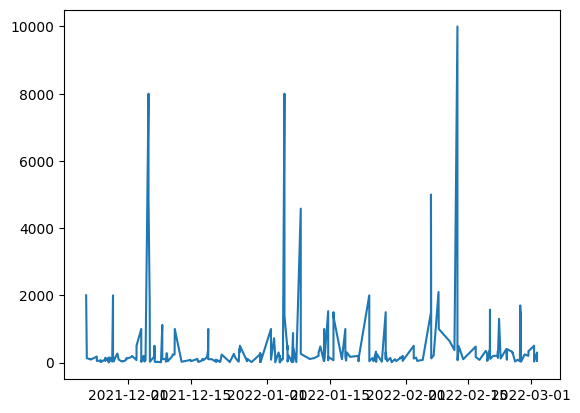

In [64]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(expense_df['Date'], expense_df['INR'])

In [67]:
# day name wise bar chart/month wise bar chart
expense_df['day_name'] =  expense_df['Date'].dt.day_name()
expense_df['day_name']

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: day_name, Length: 277, dtype: object

In [68]:
expense_df['day_name']['INR'].mean().plot(kind='bar')

KeyError: 'INR'

<Axes: ylabel='day_name'>

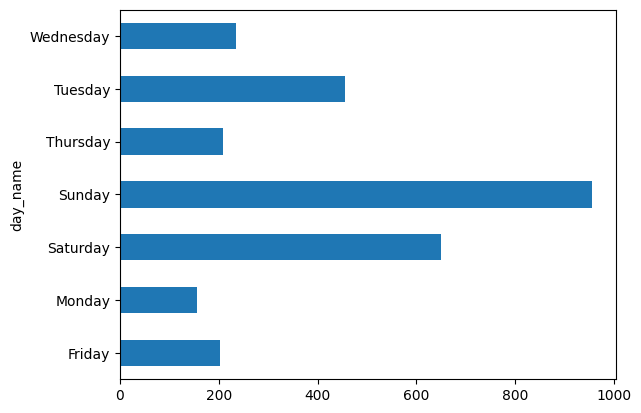

In [69]:
expense_df.groupby('day_name')['INR'].mean().plot(kind='barh')

In [71]:
expense_df['month_name'] =  expense_df['Date'].dt.month_name()

<Axes: ylabel='month_name'>

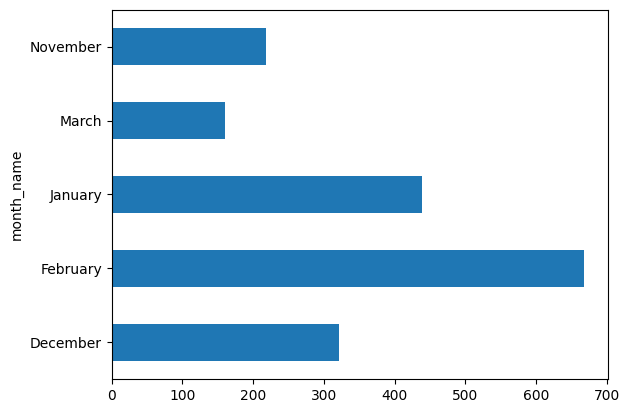

In [72]:
expense_df.groupby('month_name')['INR'].mean().plot(kind='barh')

In [74]:
expense_df[expense_df['Date'].dt.is_month_end].shape

(8, 13)